In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator

In [2]:
D={}
r={}
p={}
t={}

state_D_sorted={}
state_r_sorted={}
state_p_sorted={}

state_D_sorted_range={}
state_r_sorted_range={}
state_p_sorted_range={}


state_D_sorted_prob={}
state_r_sorted_prob={}
state_p_sorted_prob={}

mean_r={}
mean_p={}

std_r={}
std_p={}

ratio_r={}
ratio_p={}


T={}

v1=[-1,1,0]
v2=[0,-1,1]


k=[100,10000]
kl=0.001
kr=0.01
kp=0.17
k0=0.01
gammap=0.00028
gammar=0.0083
n=10

for m in range(1,3,1):
    state_D={}
    state_r={}
    state_p={}

    
    state_D_sorted_range["Case"+str(m)]=[]
    state_r_sorted_range["Case"+str(m)]=[]
    state_p_sorted_range["Case"+str(m)]=[]

    
    state_D_sorted_prob["Case"+str(m)]=[]
    state_r_sorted_prob["Case"+str(m)]=[]
    state_p_sorted_prob["Case"+str(m)]=[]

    T["Case"+str(m)]=0.0
    
    for nn in range (1000):
        D["Case"+str(m)]=[50000]
        r["Case"+str(m)]=[1000]
        p["Case"+str(m)]=[1000]
        t["Case"+str(m)]=[0]
        t_end=5
        i=0
        while (t["Case"+str(m)][i]<=t_end) & (D["Case"+str(m)][i]>0) & (r["Case"+str(m)][i]>0) & (p["Case"+str(m)][i]>0) :
            a1=kl+k0/(1+(p["Case"+str(m)][i]/k[m-1])**n)-r["Case"+str(m)][i]*gammar
            a2=r["Case"+str(m)][i]*kp-gammap*p["Case"+str(m)][i]


            asum=a1+a2
            e1 = np.random.uniform(0,1,1)
            e2 = np.random.uniform(0,1,1)
            aj=a1
            j=1
            if aj<=(e1*asum):
                aj=aj+a2
                j=2

            tau=(np.log(1/e2))/asum
            t["Case"+str(m)].append(t["Case"+str(m)][i]+tau)
            tempD=str(round(D["Case"+str(m)][i]))
            tempr=str(round(r["Case"+str(m)][i]))
            tempp=str(round(p["Case"+str(m)][i]))
            
            if tempD in state_D:
                state_D[tempD]=[round(D["Case"+str(m)][i]),state_D[tempD][1]+tau]
            else:
                state_D[tempD]=[round(D["Case"+str(m)][i]),tau]

            if tempr in state_r:
                state_r[tempr]=[round(r["Case"+str(m)][i]),state_r[tempr][1]+tau]
            else:
                state_r[tempr]=[round(r["Case"+str(m)][i]),tau]

            if tempp in state_p:
                state_p[tempp]=[round(p["Case"+str(m)][i]),state_p[tempp][1]+tau]
            else:
                state_p[tempp]=[round(p["Case"+str(m)][i]),tau]            
            
            T["Case"+str(m)]=T["Case"+str(m)]+tau
            
            if j==1:
                D["Case"+str(m)].append(D["Case"+str(m)][i]+v1[0])
                r["Case"+str(m)].append(r["Case"+str(m)][i]+v1[1])
                p["Case"+str(m)].append(p["Case"+str(m)][i]+v1[2])

            if j==2:
                D["Case"+str(m)].append(D["Case"+str(m)][i]+v2[0])
                r["Case"+str(m)].append(r["Case"+str(m)][i]+v2[1])
                p["Case"+str(m)].append(p["Case"+str(m)][i]+v2[2])

            i+=1


    state_D_sorted=sorted(state_D.items(), key=operator.itemgetter(1,0),reverse=False)
    state_r_sorted=sorted(state_r.items(), key=operator.itemgetter(1,0),reverse=False)
    state_p_sorted=sorted(state_p.items(), key=operator.itemgetter(1,0),reverse=False)
    
    tmp_mean_r=0
    tmp_mean_p=0
    tmp_std_r=0
    tmp_std_p=0
    
    

    for ii in range(len(state_r_sorted)):
        state_r_sorted_range["Case"+str(m)].append(state_r_sorted[ii][1][0])
        state_r_sorted_prob["Case"+str(m)].append(float(state_r_sorted[ii][1][1]/T["Case"+str(m)]))
        tmp_mean_r=tmp_mean_r+state_r_sorted[ii][1][0]*state_r_sorted[ii][1][1]
    mean_r["Case"+str(m)]=tmp_mean_r/T["Case"+str(m)]   
        
    for ii in range(len(state_p_sorted)):
        state_p_sorted_range["Case"+str(m)].append(state_p_sorted[ii][1][0])
        state_p_sorted_prob["Case"+str(m)].append(float(state_p_sorted[ii][1][1]/T["Case"+str(m)]))
        tmp_mean_p=tmp_mean_p+state_p_sorted[ii][1][0]*state_p_sorted[ii][1][1]
    mean_p["Case"+str(m)]=tmp_mean_p/T["Case"+str(m)]    
    
    for ii in range(len(state_r_sorted)):
        tmp_std_r=tmp_std_r+(state_r_sorted[ii][1][0]*state_r_sorted[ii][1][1]-mean_r["Case"+str(m)])**2
    std_r["Case"+str(m)]=np.sqrt(tmp_std_r/T["Case"+str(m)])
    
    for ii in range(len(state_p_sorted)):
        tmp_std_p=tmp_std_p+(state_p_sorted[ii][1][0]*state_p_sorted[ii][1][1]-mean_p["Case"+str(m)])**2
    std_p["Case"+str(m)]=np.sqrt(tmp_std_p/T["Case"+str(m)])    
    
    
    ratio_r["Case"+str(m)]=std_r["Case"+str(m)]/mean_r["Case"+str(m)]
    ratio_p["Case"+str(m)]=std_p["Case"+str(m)]/mean_p["Case"+str(m)]
            
print(f'Mean of r in Case1 is {mean_r["Case1"]}. Std of r in Case1 is {std_r["Case1"]}. Ratio of r in Case1 is {ratio_r["Case1"]}') 
print(f'Mean of r in Case2 is {mean_r["Case2"]}. Std of r in Case2 is {std_r["Case2"]}. Ratio of r in Case2 is {ratio_r["Case2"]}') 
print(f'Mean of p in Case1 is {mean_p["Case1"]}. Std of p in Case1 is {std_p["Case1"]}. Ratio of p in Case1 is {ratio_p["Case1"]}') 
print(f'Mean of p in Case2 is {mean_p["Case2"]}. Std of p in Case2 is {std_p["Case2"]}. Ratio of p in Case2 is {ratio_p["Case2"]}')        

Mean of r in Case1 is [686.06532794]. Std of r in Case1 is [1820.82949267]. Ratio of r in Case1 is [2.65401765]
Mean of r in Case2 is [685.9945871]. Std of r in Case2 is [1819.48106537]. Ratio of r in Case2 is [2.65232569]
Mean of p in Case1 is [1313.93467206]. Std of p in Case1 is [3695.04756842]. Ratio of p in Case1 is [2.81220037]
Mean of p in Case2 is [1314.0054129]. Std of p in Case2 is [3690.41685985]. Ratio of p in Case2 is [2.80852485]


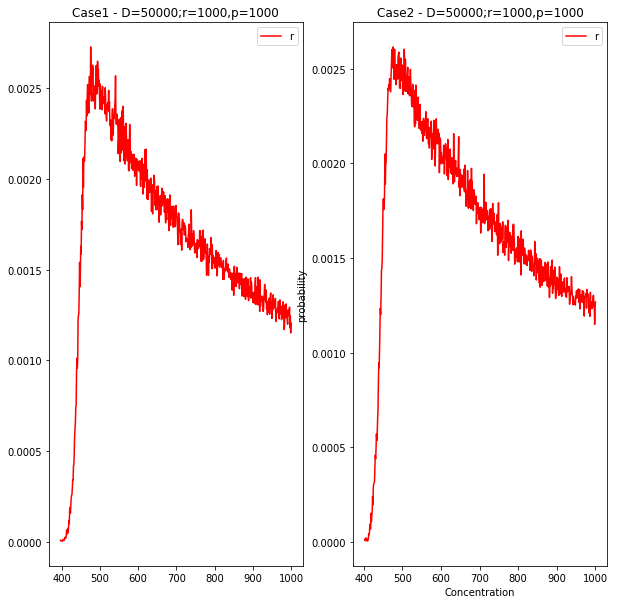

In [3]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(10,10))
plt.xlabel("Concentration")
plt.ylabel("probability")
ax1.set_title(f'Case1 - D={D["Case1"][0]};r={r["Case1"][0]},p={p["Case1"][0]}')
ax1.plot(state_r_sorted_range["Case1"],state_r_sorted_prob["Case1"],'-r')
ax1.legend(["r"])
ax2.set_title(f'Case2 - D={D["Case2"][0]};r={r["Case2"][0]},p={p["Case2"][0]}')
ax2.plot(state_r_sorted_range["Case2"],state_r_sorted_prob["Case2"],'-r')
ax2.legend(["r"]) 

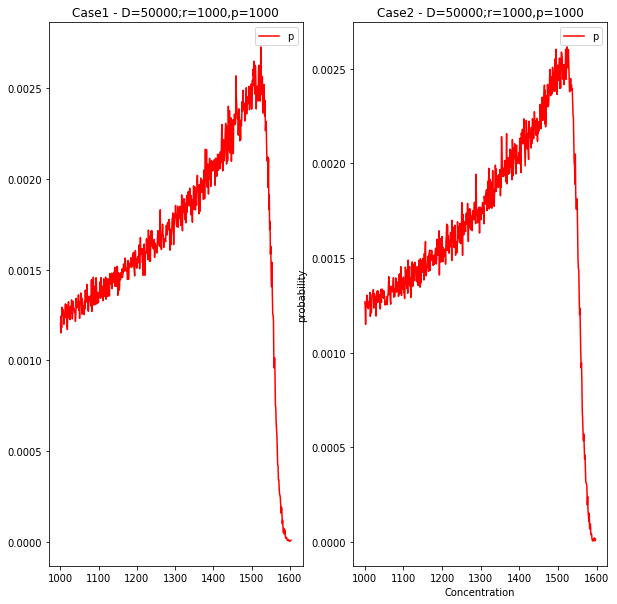

In [4]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(10,10))
plt.xlabel("Concentration")
plt.ylabel("probability")
ax1.set_title(f'Case1 - D={D["Case1"][0]};r={r["Case1"][0]},p={p["Case1"][0]}')
ax1.plot(state_p_sorted_range["Case1"],state_p_sorted_prob["Case1"],'-r')
ax1.legend(["p"])
ax2.set_title(f'Case2 - D={D["Case2"][0]};r={r["Case2"][0]},p={p["Case2"][0]}')
ax2.plot(state_p_sorted_range["Case2"],state_p_sorted_prob["Case2"],'-r')
ax2.legend(["p"]) 